# CLASE 6 REPASO Y PLANETA

In [1]:
from pylab import *
%matplotlib inline

In [2]:
sqrt(4)

2.0

In [4]:
vector =  [1,2,3,4]
print vector

[1, 2, 3, 4]


In [5]:
print vector [0]

1


In [7]:
print vector [0:2]

[1, 2]


In [8]:
print vector [1:]

[2, 3, 4]


In [9]:
if 5 == 5:
    vector[2]=10
print vector

[1, 2, 10, 4]


In [10]:
if 5 != 5:
    vector [3]=15
print vector

[1, 2, 10, 4]


In [11]:
for i in arange (10):
    print i

0
1
2
3
4
5
6
7
8
9


In [12]:
arange (10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
m = 0
for i in arange (10):
    m += i
print m

45


In [16]:
vector = [1,2,3,4]
if 5 !=5:
    vector [2]=10
elif 6==6:
    vector [2]=30
else:
    vector [2]=20
print vector

[1, 2, 30, 4]


In [17]:
len (vector)

4

# INTERACCIÓN PLANETA-LUNA-SOL

In [18]:
def rk4_a(ec,p_ini,x,args=0,h=0.001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

In [30]:
def mov(xp_xs,t,a_b=[0,0]):
    rp = sqrt(xp_xs[0]**2 + xp_xs[1]**2)
    rs = sqrt(xp_xs[4]**2 + xp_xs[5]**2)
    dif_xp_xs = xp_xs[0:2] - xp_xs[4:6]
    dist_xp_xs = sqrt(dif_xp_xs[0]**2 + dif_xp_xs[1]**2)
    
    dxp,dyp = xp_xs[2],xp_xs[3]
    dvxp = -xp_xs[0]/(rp**3) - (a_b[0]*dif_xp_xs[0])/(dist_xp_xs**3) #Como la fuerza es atractiva se utiliza un valor negativo
    dvyp = -xp_xs[1]/(rp**3) - (a_b[0]*dif_xp_xs[1])/(dist_xp_xs**3)
    
    dxs,dys = xp_xs[6],xp_xs[7]
    dvxs = -xp_xs[4]/(rp**3) + (a_b[1]*dif_xp_xs[0])/(dist_xp_xs**3) #Como la fuerza es atractiva se utiliza un valor negativo
    dvys = -xp_xs[5]/(rp**3) + (a_b[1]*dif_xp_xs[1])/(dist_xp_xs**3)
    
    return array([dxp,dyp,dvxp,dvyp,dxs,dys,dvxs,dvys])

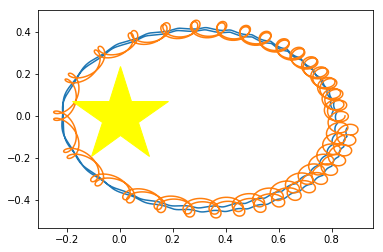

In [38]:
p_ini = [0.8,0,0,1,0.85,0,0,-2]
t,r = rk4_a(mov,p_ini,[0,1.5*pi],[0.05, 0.5])
plot(r[:,0],r[:,1],r[:,4],r[:,5])
plot([0],[0],'*',color='yellow',markersize=100)
